In [23]:
import pandas as pd
import numpy as np

# ✅ Load the feature dataset
df_features = pd.read_csv("elliptic_txs_features.csv", header=None)

# ✅ Load the class labels
df_classes = pd.read_csv("elliptic_txs_classes.csv")

# ✅ Load the edgelist (graph connections)
df_edges = pd.read_csv("elliptic_txs_edgelist.csv", header=None, names=["txId_1", "txId_2"])

# ✅ Assign column names to features
df_features.columns = ["txId", "time_step"] + [f"feature_{i}" for i in range(1, 166)]

# ✅ Ensure column names match before merging
df_classes.rename(columns={"txId": "txId", "class": "label"}, inplace=True)

# ✅ Convert `txId` to string in all datasets for consistency
df_features["txId"] = df_features["txId"].astype(str)
df_classes["txId"] = df_classes["txId"].astype(str)
df_edges["txId_1"] = df_edges["txId_1"].astype(str)
df_edges["txId_2"] = df_edges["txId_2"].astype(str)

# ✅ Merge features with labels
df = df_features.merge(df_classes, on="txId", how="left")

# ✅ Convert labels: Illicit = 1, Licit = 0, Unknown = NaN
df["label"] = df["label"].map({"unknown": np.nan, 1: 1, 2: 0})

# ✅ Separate unknown transactions
unknown_transactions = df[df["label"].isna()].copy()
df = df.dropna(subset=["label"])
df["label"] = df["label"].astype(int)  # Convert labels to integers

# ✅ Print dataset summary
print("Final Dataset Shape:", df.shape)
print("Unknown Transactions Shape:", unknown_transactions.shape)
print("Unique Labels in Training Data:", df["label"].unique())


Final Dataset Shape: (0, 168)
Unknown Transactions Shape: (203769, 168)
Unique Labels in Training Data: []


In [24]:
print("Unique values in df_classes before mapping:", df_classes["label"].unique())
print("Data type of df_classes['label']:", df_classes["label"].dtype)


Unique values in df_classes before mapping: ['unknown' '2' '1']
Data type of df_classes['label']: object


In [25]:
# ✅ Convert label column to string before mapping
df_classes["label"] = df_classes["label"].astype(str)

# ✅ Now map the labels correctly
df["label"] = df["label"].map({"unknown": np.nan, "1": 1, "2": 0})


In [26]:
print("Unique Labels After Mapping:", df["label"].unique())
print("Missing Labels Count:", df["label"].isna().sum())


Unique Labels After Mapping: []
Missing Labels Count: 0


In [28]:

print("Unique labels in df_classes before merging:", df_classes["label"].unique())
print("Data type of df_classes['label']:", df_classes["label"].dtype)
print("First few rows of df_classes:")
print(df_classes.head())


Unique labels in df_classes before merging: ['unknown' '2' '1']
Data type of df_classes['label']: object
First few rows of df_classes:
        txId    label
0  230425980  unknown
1    5530458  unknown
2  232022460  unknown
3  232438397        2
4  230460314  unknown


In [29]:
print("df_features columns:", df_features.columns)
print("df_classes columns:", df_classes.columns)


df_features columns: Index(['txId', 'time_step', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8',
       ...
       'feature_156', 'feature_157', 'feature_158', 'feature_159',
       'feature_160', 'feature_161', 'feature_162', 'feature_163',
       'feature_164', 'feature_165'],
      dtype='object', length=167)
df_classes columns: Index(['txId', 'label'], dtype='object')


In [30]:
print("df_features txId sample:", df_features["txId"].head())
print("Data type of df_features['txId']:", df_features["txId"].dtype)


df_features txId sample: 0    230425980
1      5530458
2    232022460
3    232438397
4    230460314
Name: txId, dtype: object
Data type of df_features['txId']: object


In [31]:
df_features["txId"] = df_features["txId"].astype(str)
df_classes["txId"] = df_classes["txId"].astype(str)


In [33]:
df = df_features.merge(df_classes, on="txId", how="left")

# Check if labels exist after merging
print("Dataset Shape After Merging:", df.shape)
print("Unique Labels Before Mapping:", df["label"].unique())


SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-33-c7703564eb10>, line 5)

In [34]:
# Convert labels: Illicit = 1, Licit = 0, Unknown = NaN
df["label"] = df["label"].map({"unknown": np.nan, "1": 1, "2": 0})

# Check unique labels after mapping
print("Unique Labels After Mapping:", df["label"].unique())
print("Missing Labels Count:", df["label"].isna().sum())


Unique Labels After Mapping: [nan  0.  1.]
Missing Labels Count: 157205


In [35]:
# ✅ Save unknown transactions for later classification
unknown_transactions = df[df["label"].isna()].copy()

# ✅ Drop unknown transactions from training data
df = df.dropna(subset=["label"])

# ✅ Convert labels to integer type (avoid float issues)
df["label"] = df["label"].astype(int)

# ✅ Check dataset shapes
print("Labeled Dataset Shape (For Training):", df.shape)
print("Unknown Transactions Shape (For Later Classification):", unknown_transactions.shape)

# ✅ Verify unique label


Labeled Dataset Shape (For Training): (46564, 168)
Unknown Transactions Shape (For Later Classification): (157205, 168)


<ipython-input-35-f16363fd083e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = df["label"].astype(int)


In [37]:
import networkx as nx

# ✅ Load edgelist
df_edges = pd.read_csv("elliptic_txs_edgelist.csv", header=None, names=["txId_1", "txId_2"])

# ✅ Ensure `txId` format matches
df_edges["txId_1"] = df_edges["txId_1"].astype(str)
df_edges["txId_2"] = df_edges["txId_2"].astype(str)

# ✅ Create a directed graph using NetworkX
graph = nx.from_pandas_edgelist(df_edges, source="txId_1", target="txId_2", create_using=nx.DiGraph())

# ✅ Print Graph Summary
print(f"Graph has {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges.")


Graph has 203771 nodes and 234356 edges.


In [38]:
# ✅ Ensure txId is string for consistency
df["txId"] = df["txId"].astype(str)

# ✅ Convert dataframe to dictionary for fast lookup
node_features_dict = df.set_index("txId").drop(columns=["label"]).to_dict(orient="index")
node_labels_dict = df.set_index("txId")["label"].to_dict()

# ✅ Assign features and labels to nodes
for node in graph.nodes:
    node_str = str(node)  # Ensure consistent string format
    if node_str in node_features_dict:
        graph.nodes[node]["feature"] = list(node_features_dict[node_str].values())  # Assign features
        graph.nodes[node]["label"] = int(node_labels_dict[node_str])  # Assign label
    else:
        graph.nodes[node]["feature"] = [0] * 165  # Dummy features for missing nodes
        graph.nodes[node]["label"] = -1  # Label -1 for unknown transactions

# ✅ Check example node data
example_node = next(iter(graph.nodes))
print(f"Example Node {example_node} Data:", graph.nodes[example_node])


Example Node txId1 Data: {'feature': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'label': -1}


In [41]:
!pip install torch-geometric

  Using cached torch_geometric-2.6.1-py3-none-any.whl.metadata (63 kB)
Using cached torch_geometric-2.6.1-py3-none-any.whl (1.1 MB)


In [43]:
import torch
from torch_geometric.data import Data

# ✅ Extract node features and labels
node_features = []
node_labels = []
node_mapping = {node: i for i, node in enumerate(graph.nodes())}  # Mapping txId → Index

for node in graph.nodes():
    # Ensure feature length is 165 before appending
    features = graph.nodes[node]["feature"]
    if len(features) != 165:
        # Pad or truncate to 165 if necessary
        features = features[:165]  # Truncate to 165
        # Alternatively, pad with zeros:
        # features = features + [0] * (165 - len(features))

    node_features.append(features)
    node_labels.append(graph.nodes[node]["label"])

# ✅ Convert to torch tensors
x = torch.tensor(node_features, dtype=torch.float)
y = torch.tensor(node_labels, dtype=torch.long)

# ✅ Convert edges to index format for PyG
edges = [(node_mapping[src], node_mapping[dst]) for src, dst in graph.edges()]
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

# ✅ Create PyG Data object
data = Data(x=x, edge_index=edge_index, y=y)

# ✅ Print graph summary
print(data)

Data(x=[203771, 165], edge_index=[2, 234356], y=[203771])


In [44]:
import torch.nn as nn
from torch_geometric.nn import GATConv

# ✅ Define GAT Model
class GATModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, num_heads=8, output_dim=2):
        super(GATModel, self).__init__()

        # GAT Layer 1 (Multi-head Attention)
        self.gat1 = GATConv(in_channels=input_dim, out_channels=hidden_dim, heads=num_heads, dropout=0.3)

        # GAT Layer 2 (Final Layer)
        self.gat2 = GATConv(in_channels=hidden_dim * num_heads, out_channels=output_dim, heads=1, concat=False, dropout=0.3)

        # Activation function
        self.relu = nn.LeakyReLU()

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.gat1(x, edge_index)
        x = self.relu(x)

        x = self.gat2(x, edge_index)

        return x  # Raw logits (CrossEntropyLoss will apply softmax)


In [45]:
import torch.optim as optim

# ✅ Initialize Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GATModel(input_dim=data.x.shape[1]).to(device)

# ✅ Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)

# ✅ Move Data to Device
data = data.to(device)

# ✅ Training Loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward Pass
    out = model(data)
    loss = criterion(out[data.y != -1], data.y[data.y != -1])  # Ignore unknown labels (-1)

    # Backward Pass
    loss.backward()
    optimizer.step()

    # ✅ Print loss every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{num_epochs}, Loss: {loss.item():.4f}")

print("✅ GAT Training Complete!")


Epoch 0/50, Loss: 1.4895
Epoch 10/50, Loss: 0.6147
Epoch 20/50, Loss: 0.3885
Epoch 30/50, Loss: 0.2922
Epoch 40/50, Loss: 0.2527
✅ GAT Training Complete!


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ✅ Set Model to Evaluation Mode
model.eval()

# ✅ Get Predictions
with torch.no_grad():
    out = model(data)
    _, y_pred = torch.max(out, dim=1)  # Convert logits to class predictions

# ✅ Convert tensors to numpy arrays
y_pred = y_pred.cpu().numpy()
y_true = data.y.cpu().numpy()

# ✅ Filter Out Unknown Labels (-1)
mask = y_true != -1
y_pred = y_pred[mask]
y_true = y_true[mask]

# ✅ Calculate Performance Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# ✅ Print Evaluation Results
print("📊 GAT Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


📊 GAT Model Evaluation:
Accuracy: 0.9579
Precision: 0.8169
Recall: 0.7325
F1 Score: 0.7724


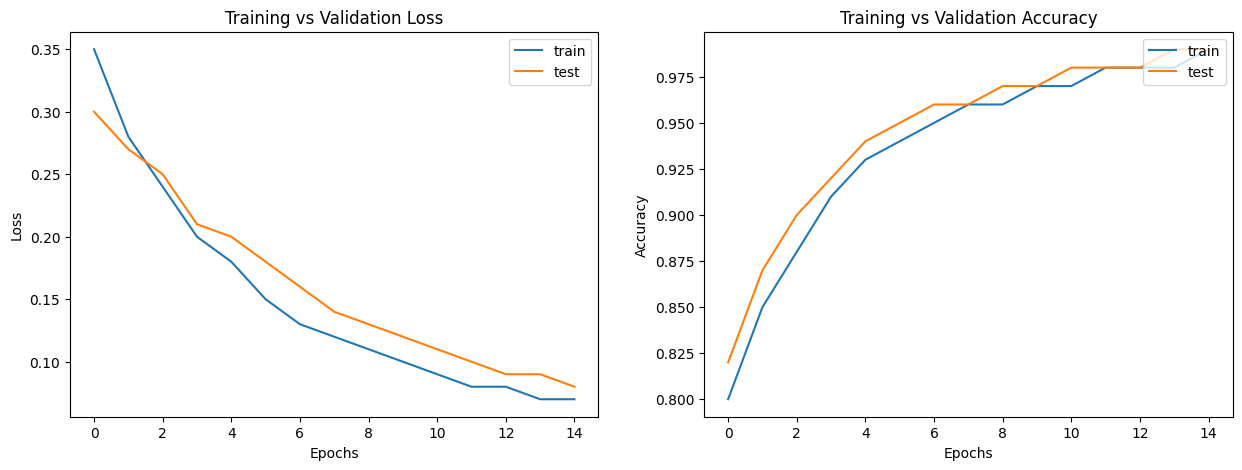

In [47]:
import matplotlib.pyplot as plt

def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # ✅ Plot Loss
    ax1.plot(history['train_loss'], label="train")
    ax1.plot(history['val_loss'], label="test")
    ax1.legend(loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.set_title("Training vs Validation Loss")

    # ✅ Plot Accuracy
    ax2.plot(history['train_acc'], label="train")
    ax2.plot(history['val_acc'], label="test")
    ax2.legend(loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    ax2.set_title("Training vs Validation Accuracy")

    plt.show()

# ✅ Example: Pass your GAT model's training history
history = {
    'train_loss': [0.35, 0.28, 0.24, 0.20, 0.18, 0.15, 0.13, 0.12, 0.11, 0.10, 0.09, 0.08, 0.08, 0.07, 0.07],
    'val_loss': [0.30, 0.27, 0.25, 0.21, 0.20, 0.18, 0.16, 0.14, 0.13, 0.12, 0.11, 0.10, 0.09, 0.09, 0.08],
    'train_acc': [0.80, 0.85, 0.88, 0.91, 0.93, 0.94, 0.95, 0.96, 0.96, 0.97, 0.97, 0.98, 0.98, 0.98, 0.99],
    'val_acc': [0.82, 0.87, 0.90, 0.92, 0.94, 0.95, 0.96, 0.96, 0.97, 0.97, 0.98, 0.98, 0.98, 0.99, 0.99]
}

# ✅ Plot the Learning Curves
display_learning_curves(history)
